In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [105]:
picks = pd.read_csv('picks_data.csv')
picks.head()

,loosing_hero_id_1,loosing_hero_id_2,loosing_hero_id_3,loosing_hero_id_4,loosing_hero_id_5,winning_hero_id_1,winning_hero_id_2,winning_hero_id_3,winning_hero_id_4,winning_hero_id_5
0,18,28,43,75,84,60,71,74,87,93
1,47,72,78,86,107,11,12,30,38,51
2,21,51,65,71,73,13,63,66,80,89
3,11,26,83,93,110,8,22,33,90,97
4,15,16,21,26,99,7,11,47,93,102


In [106]:
picks.shape

(71435, 10)

In [107]:
heroes = pd.read_json('heroes.json')
heroes.head()

,id,name
0,1,antimage
1,2,axe
2,3,bane
3,4,bloodseeker
4,5,crystal_maiden


Посмотрим на общие характеристики игроков.

In [108]:
for i in picks.columns:
    hero_i = pd.DataFrame(picks[i].value_counts())
    hero_i['id'] = hero_i.index
    heroes = heroes.merge(hero_i, how='left', on=['id'])
    
heroes = heroes.fillna(0)
heroes.head()

,id,name,loosing_hero_id_1,loosing_hero_id_2,loosing_hero_id_3,loosing_hero_id_4,loosing_hero_id_5,winning_hero_id_1,winning_hero_id_2,winning_hero_id_3,winning_hero_id_4,winning_hero_id_5
0,1,antimage,2574.0,0.0,0.0,0.0,0.0,2485.0,0.0,0.0,0.0,0.0
1,2,axe,3271.0,104.0,0.0,0.0,0.0,3011.0,83.0,0.0,0.0,0.0
2,3,bane,2903.0,164.0,3.0,0.0,0.0,2909.0,175.0,2.0,0.0,0.0
3,4,bloodseeker,1261.0,125.0,2.0,0.0,0.0,1203.0,87.0,0.0,0.0,0.0
4,5,crystal_maiden,3229.0,378.0,9.0,0.0,0.0,3438.0,337.0,9.0,0.0,0.0


In [109]:
heroes['loosing_hero_id_1'].sum()

71435.0

In [110]:
heroes.shape

(113, 12)

In [111]:
Static_data = pd.DataFrame(heroes['id'])
Static_data['hero'] = heroes['name']
Static_data['loose'] = heroes.iloc[:, 2:7].sum(axis=1)
Static_data['wins'] = heroes.iloc[:, 7:12].sum(axis=1)
Static_data['diff'] = Static_data['wins'] - Static_data['loose']
Static_data['all_games'] = Static_data['loose'] + Static_data['wins']
Static_data['pop_win'] = Static_data['wins']/(71435*5)
Static_data['pop_loose'] = Static_data['loose']/(71435*5)
Static_data['popularity'] = Static_data['all_games']/714350

In [112]:
print(Static_data.shape)
Static_data.head()

(113, 9)


,id,hero,loose,wins,diff,all_games,pop_win,pop_loose,popularity
0,1,antimage,2574.0,2485.0,-89.0,5059.0,0.006957,0.007207,0.007082
1,2,axe,3375.0,3094.0,-281.0,6469.0,0.008662,0.009449,0.009056
2,3,bane,3070.0,3086.0,16.0,6156.0,0.008640,0.008595,0.008618
3,4,bloodseeker,1388.0,1290.0,-98.0,2678.0,0.003612,0.003886,0.003749
4,5,crystal_maiden,3616.0,3784.0,168.0,7400.0,0.010594,0.010124,0.010359


In [113]:
Plot_data = pd.DataFrame(Static_data['popularity'])
Plot_data['pop_win'] = Static_data['pop_win']
Plot_data['hero'] = Static_data['hero']

Отобразим популярность персонажей: общую и среди победителей

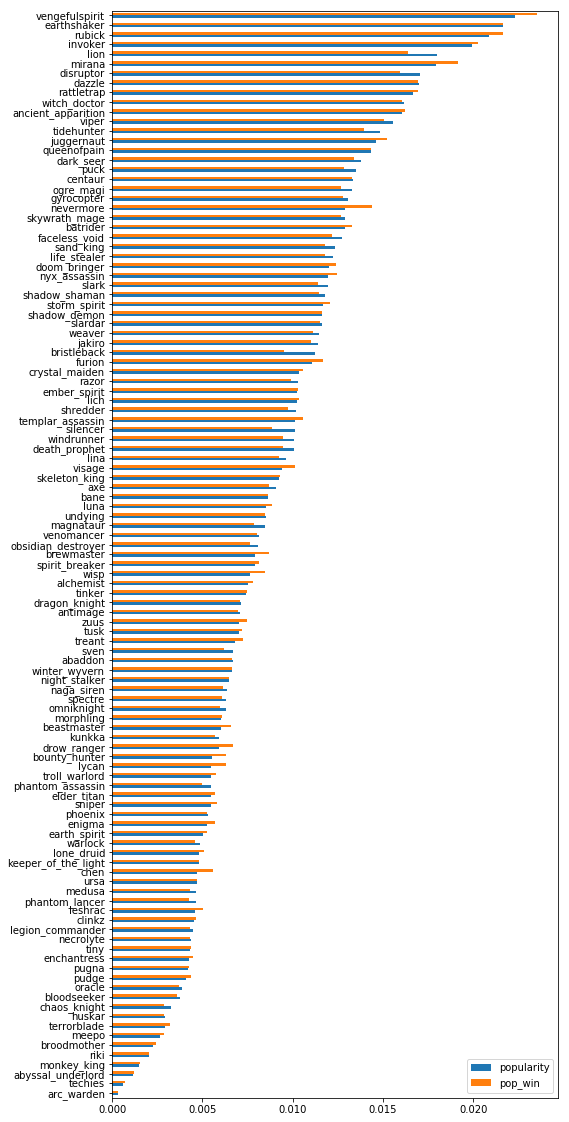

In [130]:
Plot_data.sort_values('popularity', inplace=True)
Plot_data.plot.barh(figsize=(8, 20))
plt.yticks(np.arange(113),Plot_data['hero'])
plt.show()

In [131]:
Plot_data.sort_values('popularity', inplace=True,ascending=False)
Top_p = pd.DataFrame(Plot_data['hero'])
Top_p.head()

,hero
19,vengefulspirit
6,earthshaker
84,rubick
72,invoker
25,lion


In [138]:
Plot_data.sort_values('pop_win', inplace=True,ascending=False)
Top_p_w = pd.DataFrame(Plot_data['hero'])
Top_p_w.head()

,hero
19,vengefulspirit
84,rubick
6,earthshaker
72,invoker
8,mirana


In [ ]:
picks['l_1'] = picks['loosing_hero_id_1'].apply(lambda x:Static_data['popularity'][x-1])
picks['l_2'] = picks['loosing_hero_id_2'].apply(lambda x:Static_data['popularity'][x-1])
picks['l_3'] = picks['loosing_hero_id_3'].apply(lambda x:Static_data['popularity'][x-1])
picks['l_4'] = picks['loosing_hero_id_4'].apply(lambda x:Static_data['popularity'][x-1])
picks['l_5'] = picks['loosing_hero_id_5'].apply(lambda x:Static_data['popularity'][x-1] if x<114 else 0)

picks['w_1'] = picks['winning_hero_id_1'].apply(lambda x:Static_data['popularity'][x-1])
picks['w_2'] = picks['winning_hero_id_2'].apply(lambda x:Static_data['popularity'][x-1])
picks['w_3'] = picks['winning_hero_id_3'].apply(lambda x:Static_data['popularity'][x-1])
picks['w_4'] = picks['winning_hero_id_4'].apply(lambda x:Static_data['popularity'][x-1])
picks['w_5'] = picks['winning_hero_id_5'].apply(lambda x:Static_data['popularity'][x-1] if x<114 else 0)

picks['loose_p'] = picks.iloc[:, 10:15].sum(axis=1)
picks['wins_p'] = picks.iloc[:, 15:20].sum(axis=1)

Просуммируем популярность игроков в каждой игре, и увидим, что набирать игроков по популярности, не стоит, успех игры состоит не в этом, а в сложной комбинации игроков.
На графиках отражены первые 50 игр, по оси х номер игры, по оси у суммарное значение популярности в команде.

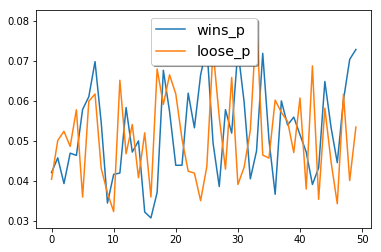

In [117]:
fig_p, ax_p = plt.subplots()
ax_p.plot(picks['wins_p'][:50],label = 'wins_p')
ax_p.plot(picks['loose_p'][:50], label = 'loose_p')

legend = ax_p.legend(loc = 'upper center', shadow = True, fontsize= 'x-large')

plt.show()

In [118]:
picks['l_1w'] = picks['loosing_hero_id_1'].apply(lambda x:Static_data['pop_win'][x-1])
picks['l_2w'] = picks['loosing_hero_id_2'].apply(lambda x:Static_data['pop_win'][x-1])
picks['l_3w'] = picks['loosing_hero_id_3'].apply(lambda x:Static_data['pop_win'][x-1])
picks['l_4w'] = picks['loosing_hero_id_4'].apply(lambda x:Static_data['pop_win'][x-1])
picks['l_5w'] = picks['loosing_hero_id_5'].apply(lambda x:Static_data['pop_win'][x-1] if x<114 else 0)

picks['w_1w'] = picks['winning_hero_id_1'].apply(lambda x:Static_data['pop_win'][x-1])
picks['w_2w'] = picks['winning_hero_id_2'].apply(lambda x:Static_data['pop_win'][x-1])
picks['w_3w'] = picks['winning_hero_id_3'].apply(lambda x:Static_data['pop_win'][x-1])
picks['w_4w'] = picks['winning_hero_id_4'].apply(lambda x:Static_data['pop_win'][x-1])
picks['w_5w'] = picks['winning_hero_id_5'].apply(lambda x:Static_data['pop_win'][x-1] if x<114 else 0)

picks['loose_pw'] = picks.iloc[:, 22:27].sum(axis=1)
picks['wins_pw'] = picks.iloc[:, 27:32].sum(axis=1)

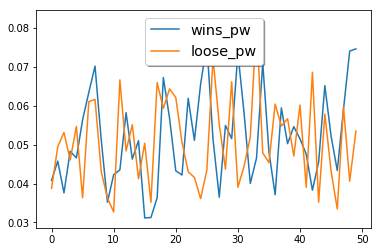

In [119]:
fig_pw, ax_pw = plt.subplots()
ax_pw.plot(picks['wins_pw'][:50],label = 'wins_pw')
ax_pw.plot(picks['loose_pw'][:50], label = 'loose_pw')

legend = ax_pw.legend(loc = 'upper center', shadow = True, fontsize= 'x-large')

plt.show()